# 영화 평점 크롤링

In [1]:
import pandas as pd

import requests
from bs4 import BeautifulSoup
import time
from tqdm import tqdm
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.common.alert import Alert
from urllib import parse

In [2]:
df = pd.read_excel('c:/2nd_project/Data/movie_data/[KOBIS] 박스오피스_줄거리_감정키워드(2003.01~2023.07).xlsx', engine='openpyxl')
df

,영화명,개봉일,누적관객수,등급,장르,대표국적,국적,제작사,배급사,감독,배우,줄거리,키워드
0,#살아있다,2020-06-24,1903992,15세이상관람가,드라마,한국,한국,"영화사 집,(주)퍼스펙티브픽쳐스",롯데컬처웍스(주)롯데엔터테인먼트,조일형,"유아인,박신혜,전배수,고나영,권용채,김경태,김다영,김단비,김라희,김미래,김미래,김윤...",NaN,NaN
1,#아이엠히어,2021-01-14,16404,12세이상관람가,"멜로/로맨스,코미디",프랑스,프랑스,NaN,(주)넥스트엔터테인먼트월드(NEW),에릭 라티고,"알랭 샤바,배두나,이명자,선종남,김자금,강현중,정윤하,송경의,엄지만,남승화,이지민,...",NaN,NaN
2,#위왓치유,2021-06-03,1908,청소년관람불가,다큐멘터리,기타,기타,NaN,찬란,"바르보라 차르포바,비트 클루삭",NaN,NaN,NaN
3,...ing,2003-11-28,34308,12세관람가,"드라마,멜로/로맨스",한국,한국,드림맥스(주),(주)튜브엔터테인먼트,이언희,"임수정,김래원,이미숙,김지영,김현수,박혜연,장미,이성경,박소연,김순애,최덕문,김인문...",홀엄마가 뽀뽀하자고 달려들면 '욕구 불만이야. 애인을 구해봐.'라고 얘기하는 여고생...,NaN
4,0.0MHz,2019-05-29,137294,15세이상관람가,공포(호러),한국,한국,(주)제이엠컬쳐스,(주)스마일이엔티,유선동,"정은지,이성열,최윤영,신주환,정원창,박명신,남관효,박대희,노혜영,서진석,김대현,신승...","에디슨의 마지막 발명품, 유령 탐지기?“증명할 수 없는 미스터리란 없다”가지 말라는...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18415,항구의 니쿠코짱!,2023-04-27,10539,전체관람가,애니메이션,일본,일본,NaN,트윈플러스파트너스(주),와타나베 아유무,"오타케 시노부,하나에 나츠키",﻿“보통날이 제일 좋은 거야!” 평범한 인생도 ‘갓생’으로 만드는 무한 긍정 에너지...,NaN
18416,해시태그 시그네,2023-01-11,4411,15세이상관람가,"멜로/로맨스,코미디",노르웨이,노르웨이,NaN,판씨네마(주),NaN,NaN,카페 바리스타로 따분한 인생을 살던 '시그네'에겐 행위 예술가로 매거진 표지를 장식...,NaN
18417,헌티드 맨션,2023-07-26,11075,12세이상관람가,공포(호러),미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,저스틴 시미엔,"티파니 해디쉬,오웬 윌슨,대니 드비토,로자리오 도슨",디즈니 &amp; &lt;캐리비안의 해적&gt; 제작진의 오싹한 초대장! 뉴올리언스...,NaN
18418,호쿠사이,2023-07-16,339,12세이상관람가,드라마,일본,일본,NaN,(주)미디어캐슬,하시모토 하지메,"야기라 유야,타나카 민,타마키 히로시,타키모토 미오리,츠다 칸지,아오키 무네타카",호화찬란한 상인문화로 채색된 에도 거리 한쪽 구석에 싹트지 않는 화가가 한 명이 있...,NaN


In [3]:
df.sort_values(by=['개봉일', '영화명'], ascending=[False, True], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(3)

,영화명,개봉일,누적관객수,등급,장르,대표국적,국적,제작사,배급사,감독,배우,줄거리,키워드
0,레이디,2023-07-26,140,15세이상관람가,"드라마,멜로/로맨스,코미디",한국,한국,(주)크리허브,주식회사 씨엠닉스,오성수,오성수,사연을 품은 채 한적한 마을에서 “파란나라”라는 게스트하우스를 운영하는 주인공 여정...,NaN
1,메타모르포제의 툇마루,2023-07-26,1333,12세이상관람가,기타,일본,일본,NaN,(주)미디어캐슬,카리야마 슌스케,"아시다 마나,미야모토 노부코,타카하시 쿄헤이,후루카와 코토네",인간관계에 서툰 17세 여고생 ‘우라라’.방과 후 서점에서 아르바이트를 하는 그녀의...,NaN
2,밀수,2023-07-26,1978242,15세이상관람가,범죄,한국,한국,(주)외유내강,(주)넥스트엔터테인먼트월드(NEW),류승완,"김혜수,염정아,조인성,박정민,김종수,고민시",열길 물속은 알아도 한길 사람 속은 모른다!평화롭던 바닷가 마을 군천에 화학 공장이...,NaN


In [4]:
new_col = ['검색 영화명' ,'검색 개봉일', '평점', '남자 평점', '여자 평점', '10대 평점', '20대 평점', '30대 평점', '40대 평점', '50대 평점', '리뷰 평점', '리뷰', '포스터']
for col in new_col:
    df[col] = ''
df.head(3)

,영화명,개봉일,누적관객수,등급,장르,대표국적,국적,제작사,배급사,감독,...,남자 평점,여자 평점,10대 평점,20대 평점,30대 평점,40대 평점,50대 평점,리뷰 평점,리뷰,포스터
0,레이디,2023-07-26,140,15세이상관람가,"드라마,멜로/로맨스,코미디",한국,한국,(주)크리허브,주식회사 씨엠닉스,오성수,...,,,,,,,,,,
1,메타모르포제의 툇마루,2023-07-26,1333,12세이상관람가,기타,일본,일본,NaN,(주)미디어캐슬,카리야마 슌스케,...,,,,,,,,,,
2,밀수,2023-07-26,1978242,15세이상관람가,범죄,한국,한국,(주)외유내강,(주)넥스트엔터테인먼트월드(NEW),류승완,...,,,,,,,,,,


In [5]:
df.columns

Index(['영화명', '개봉일', '누적관객수', '등급', '장르', '대표국적', '국적', '제작사', '배급사', '감독',
       '배우', '줄거리', '키워드', '검색 영화명', '검색 개봉일', '평점', '남자 평점', '여자 평점',
       '10대 평점', '20대 평점', '30대 평점', '40대 평점', '50대 평점', '리뷰 평점', '리뷰', '포스터'],
      dtype='object')

In [6]:
df.loc[0]

영화명                                                     레이디
개봉일                                              2023-07-26
누적관객수                                                   140
등급                                                 15세이상관람가
장르                                           드라마,멜로/로맨스,코미디
대표국적                                                     한국
국적                                                       한국
제작사                                                 (주)크리허브
배급사                                               주식회사 씨엠닉스
감독                                                      오성수
배우                                                      오성수
줄거리       사연을 품은 채 한적한 마을에서 “파란나라”라는 게스트하우스를 운영하는 주인공 여정...
키워드                                                     NaN
검색 영화명                                                     
검색 개봉일                                                     
평점                                                         
남자 평점                                   

In [ ]:
# num = 0

# for i in df['영화명'][:3]:
#     print(i)
#     df.loc[num, '평점'] = 7
#     # condition = df['영화명'] == i
#     # df.loc[condition, '평점'] = 10
#     num += 1
# df.head(3)

In [ ]:
# base_url = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query='
# driver = webdriver.Chrome()
# driver.get(base_url)

# sup_url = parse.quote(f'영화 레이디 평점')
# url = base_url + sup_url
# driver.get(url)
# req = requests.get(url)
# soup = BeautifulSoup(req.text, 'html.parser')

# # 영화명
# mname = movie_list
# print(mname)

# # 기본정보 클릭
# time.sleep(0.3)
# driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[2]/div[1]/div[3]/div/div/ul/li[2]/a').click()

# html = driver.page_source
# soup = BeautifulSoup(html, 'html.parser')

In [ ]:
# # soup.select('.area_text_title > strong')[0].get_text()
# soup.select('.detail_info > dl')[0].select('div')[0].get_text().strip().split(' ')[1]

In [7]:
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}

base_url = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query='
driver = webdriver.Chrome()
driver.get(base_url)

error_list = []
running_list = []

start_list = list(range(0, 18001, 300))
end_list = list(range(300,18421, 300))

for k in range(len(start_list)):
    k = k + 2
    print(f'진행중 : start[{k}] = {start_list[k]} / end[{k}] = {end_list[k]} / k = {k}')
    df_part = pd.DataFrame(columns = ['영화명', '개봉일', '누적관객수', '등급', '장르', '대표국적', '국적', '제작사', '배급사', '감독', 
    '배우', '줄거리', '키워드', '검색 영화명', '검색 개봉일', '평점', '남자 평점', '여자 평점', 
    '10대 평점', '20대 평점', '30대 평점', '40대 평점', '50대 평점', '리뷰 평점', '리뷰', '포스터'])

    start = start_list[k]
    end = end_list[k]

    count = start
    for movie_list in tqdm(df['영화명'][start:end]):
        error_txt = ''
        try:
            mname = movie_list
            df_part.loc[count, '영화명'] = df.loc[count, '영화명']
            df_part.loc[count, '개봉일'] = df.loc[count,'개봉일']
            df_part.loc[count, '누적관객수'] = df.loc[count,'누적관객수']
            df_part.loc[count, '등급'] = df.loc[count,'등급']
            df_part.loc[count, '장르'] = df.loc[count,'장르']
            df_part.loc[count, '대표국적'] = df.loc[count,'대표국적']
            df_part.loc[count, '국적'] = df.loc[count,'국적']
            df_part.loc[count, '제작사'] = df.loc[count,'제작사']
            df_part.loc[count, '배급사'] = df.loc[count,'배급사']
            df_part.loc[count, '감독'] = df.loc[count,'감독']
            df_part.loc[count, '배우'] = df.loc[count,'배우']
            df_part.loc[count, '줄거리'] = df.loc[count,'줄거리']
            df_part.loc[count, '키워드'] = df.loc[count,'키워드']

            sup_url = parse.quote(f'영화 {movie_list} 평점')
            url = base_url + sup_url
            driver.get(url)
            req = requests.get(url, headers=headers)
            soup_1 = BeautifulSoup(req.text, 'html.parser')
            mname = movie_list
            
            time.sleep(1)

            # 공감순 리뷰 페이지 내리기
            driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[2]/div[2]/div[2]/div/div[2]/div[2]/div/div[1]/ul/li[2]/a').click()

            driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[2]/div[2]/div[2]/div/div[2]/div[4]/div/div/div/div/ul/li[1]/a').click()

            driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[2]/div[2]/div[2]/div/div[2]/div[6]').click()


            html = driver.page_source
            soup_2 = BeautifulSoup(html, 'html.parser')
            

            # 전체 평점
            try:
                tot_score = float(soup_2.select('.area_star_number')[0].get_text())
                df_part.loc[count, '평점'] = tot_score
            except:
                df_part.loc[count, '평점'] = 0

            # 남자 평점
            try:
                man_score = float(soup_2.select('.area_star_number')[1].get_text())
                df_part.loc[count, '남자 평점'] = man_score
            except:
                df_part.loc[count, '남자 평점'] = 0

            # 여자 평점
            try:
                girl_score = float(soup_2.select('.area_star_number')[2].get_text())
                df_part.loc[count, '여자 평점'] = girl_score
            except:
                df_part.loc[count, '여자 평점'] = 0

            # 10대 만족도
            try:
                age10_score = float(soup_2.select('.area_graph_age > li')[0].select('.this_text_num')[0].get_text())
                df_part.loc[count, '10대 평점'] = age10_score
            except:
                df_part.loc[count, '10대 평점'] = 0

            # 20대 만족도
            try:
                age20_score = float(soup_2.select('.area_graph_age > li')[1].select('.this_text_num')[0].get_text())
                df_part.loc[count, '20대 평점'] = age20_score
            except:
                df_part.loc[count, '20대 평점'] = 0

            # 30대 만족도
            try:
                age30_score = float(soup_2.select('.area_graph_age > li')[2].select('.this_text_num')[0].get_text())
                df_part.loc[count, '30대 평점'] = age30_score
            except:
                df_part.loc[count, '30대 평점'] = 0

            # 40대 만족도
            try:
                age40_score = float(soup_2.select('.area_graph_age > li')[3].select('.this_text_num')[0].get_text())
                df_part.loc[count, '40대 평점'] = age40_score
            except:
                df_part.loc[count, '40대 평점'] = 0

            # 50대 만족도
            try:
                age50_score = float(soup_2.select('.area_graph_age > li')[4].select('.this_text_num')[0].get_text())
                df_part.loc[count, '50대 평점'] = age50_score
            except:
                df_part.loc[count, '50대 평점'] = 0



            # 리뷰 20개 미만 처리
            min = len(soup_2.select('.area_card_outer._item_wrapper > li'))

            rev_sco = []
            rev_row = []

            # 상위 리뷰 3개 추출
            if min >= 3:
                try:
                    for cnt in range(0,3):
                        rev = soup_2.select('.area_card_outer._item_wrapper > li > .area_review_content > div')[cnt].select('.desc')[0].get_text()
                        rev_row.append(rev)
                        rev_score = int(soup_2.select('.area_card_outer._item_wrapper > li .area_text_box')[cnt].get_text().split(')')[1])
                        rev_sco.append(rev_score)

                except:
                    continue
            else:
                try:
                    for cnt in range(0,min):
                        rev = soup_2.select('.area_card_outer._item_wrapper > li > .area_review_content > div')[cnt].select('.desc')[0].get_text().strip()
                        rev_row.append(rev)
                        rev_score = int(soup_2.select('.area_card_outer._item_wrapper > li .area_text_box')[cnt].get_text().split(')')[1])
                        rev_sco.append(rev_score)
                except:
                    error_txt = '리뷰 error'
                    continue
            df_part.loc[count, '리뷰'] = '/ '.join(rev_row)
            df_part.loc[count, '리뷰 평점'] = str(' / '.join(map(str, rev_sco)))
            ## print(f'{count} : {mname} Ok')
        except:
            # print(f'--------{count} : {mname} Error------- : {error_txt}')
            error_list.append(mname)
            continue
        finally:
            count += 1
            if count % 50 == 0:
                driver.quit()
                time.sleep(3)
                driver = webdriver.Chrome()
                driver.get(base_url)
    df_part.to_csv(f'c:/2nd_project/Data/review_speedup/test_{k+1}.csv', index=False)

  0%|          | 0/300 [00:00<?, ?it/s]

진행중 : start[2] = 600 / end[2] = 900 / k = 2


  0%|          | 0/300 [00:00<?, ?it/s]

진행중 : start[3] = 900 / end[3] = 1200 / k = 3


  0%|          | 0/300 [00:00<?, ?it/s]

진행중 : start[4] = 1200 / end[4] = 1500 / k = 4


  0%|          | 0/300 [00:00<?, ?it/s]

진행중 : start[5] = 1500 / end[5] = 1800 / k = 5


  0%|          | 0/300 [00:00<?, ?it/s]

진행중 : start[6] = 1800 / end[6] = 2100 / k = 6


  0%|          | 0/300 [00:00<?, ?it/s]

진행중 : start[7] = 2100 / end[7] = 2400 / k = 7


  0%|          | 0/300 [00:00<?, ?it/s]

진행중 : start[8] = 2400 / end[8] = 2700 / k = 8


  0%|          | 0/300 [00:00<?, ?it/s]

진행중 : start[9] = 2700 / end[9] = 3000 / k = 9


  0%|          | 0/300 [00:00<?, ?it/s]

진행중 : start[10] = 3000 / end[10] = 3300 / k = 10


  0%|          | 0/300 [00:00<?, ?it/s]

진행중 : start[11] = 3300 / end[11] = 3600 / k = 11


  0%|          | 0/300 [00:00<?, ?it/s]

진행중 : start[12] = 3600 / end[12] = 3900 / k = 12


  0%|          | 0/300 [00:00<?, ?it/s]

진행중 : start[13] = 3900 / end[13] = 4200 / k = 13


  0%|          | 0/300 [00:00<?, ?it/s]

진행중 : start[14] = 4200 / end[14] = 4500 / k = 14


  0%|          | 0/300 [00:00<?, ?it/s]

진행중 : start[15] = 4500 / end[15] = 4800 / k = 15


  0%|          | 0/300 [00:00<?, ?it/s]

진행중 : start[16] = 4800 / end[16] = 5100 / k = 16


  0%|          | 0/300 [00:00<?, ?it/s]

진행중 : start[17] = 5100 / end[17] = 5400 / k = 17


  0%|          | 0/300 [00:00<?, ?it/s]

진행중 : start[18] = 5400 / end[18] = 5700 / k = 18


  0%|          | 0/300 [00:00<?, ?it/s]

진행중 : start[19] = 5700 / end[19] = 6000 / k = 19


  0%|          | 0/300 [00:00<?, ?it/s]

진행중 : start[20] = 6000 / end[20] = 6300 / k = 20


  0%|          | 0/300 [00:00<?, ?it/s]

진행중 : start[21] = 6300 / end[21] = 6600 / k = 21


  0%|          | 0/300 [00:00<?, ?it/s]

진행중 : start[22] = 6600 / end[22] = 6900 / k = 22


  0%|          | 0/300 [00:00<?, ?it/s]

진행중 : start[23] = 6900 / end[23] = 7200 / k = 23


  0%|          | 0/300 [00:00<?, ?it/s]

진행중 : start[24] = 7200 / end[24] = 7500 / k = 24


  0%|          | 0/300 [00:00<?, ?it/s]

진행중 : start[25] = 7500 / end[25] = 7800 / k = 25


  0%|          | 0/300 [00:00<?, ?it/s]

진행중 : start[26] = 7800 / end[26] = 8100 / k = 26


  0%|          | 0/300 [00:00<?, ?it/s]

진행중 : start[27] = 8100 / end[27] = 8400 / k = 27


  0%|          | 0/300 [00:00<?, ?it/s]

진행중 : start[28] = 8400 / end[28] = 8700 / k = 28


  0%|          | 0/300 [00:00<?, ?it/s]

진행중 : start[29] = 8700 / end[29] = 9000 / k = 29


  0%|          | 0/300 [00:00<?, ?it/s]

진행중 : start[30] = 9000 / end[30] = 9300 / k = 30


  0%|          | 0/300 [00:00<?, ?it/s]

진행중 : start[31] = 9300 / end[31] = 9600 / k = 31


  0%|          | 0/300 [00:00<?, ?it/s]

진행중 : start[32] = 9600 / end[32] = 9900 / k = 32


  0%|          | 0/300 [00:00<?, ?it/s]

진행중 : start[33] = 9900 / end[33] = 10200 / k = 33


  0%|          | 0/300 [00:00<?, ?it/s]

진행중 : start[34] = 10200 / end[34] = 10500 / k = 34


 66%|██████▌   | 198/300 [07:30<03:46,  2.22s/it]

In [ ]:
매롱

In [ ]:
import pandas as pd


df1 = pd.read_csv('c:/2nd_project/Data/review_speedup/test_1.csv')
df2 = pd.read_csv('c:/2nd_project/Data/review_speedup/test_2.csv')
df3 = pd.read_csv('c:/2nd_project/Data/review_speedup/test_3.csv')

In [ ]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df

In [ ]:
base_url = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query='
driver = webdriver.Chrome()
driver.get(base_url)

error_list = []
ec = 0
count = 0

for movie_list in tqdm(movie_lists):
    try:
        sup_url = parse.quote(f'영화 {movie_list} 평점')
        url = base_url + sup_url
        driver.get(url)
        req = requests.get(url)
        soup = BeautifulSoup(req.text, 'html.parser')

        # 기본정보 클릭
        time.sleep(0.3)
        driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[2]/div[1]/div[3]/div/div/ul/li[2]/a').click()

        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        
        # 검색 영화명
        mname = soup.select('.area_text_title > strong')[0].get_text()
        df.loc[count, '검색 영화명'] = mname

        # 개봉일
        date = soup.select('.detail_info > dl')[0].select('div')[0].get_text().strip().split(' ')[1]
        df.loc[count, '검색 개봉일'] = date
        print(date)

        # 포스터
        movie_img = soup.select('.detail_info > a')[0].select('img')[0]['src']
        df.loc[count, '포스터'] = movie_img
        # # 러닝타임
        # runtime = soup.select('.detail_info > dl')[0].select('div')[4].get_text().strip().split(' ')[1]
        
        # # 평점 클릭
        time.sleep(0.3)
        driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[2]/div[1]/div[3]/div/div/ul/li[4]/a').click()
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        
        # 전체 평점
        try:
            tot_score = float(soup.select('.area_star_number')[0].get_text())
            df.loc[count, '평점'] = tot_score
        except:
            df.loc[count, '평점'] = 0

        # 남자 평점
        try:
            man_score = float(soup.select('.area_star_number')[1].get_text())
            df.loc[count, '남자 평점'] = man_score
        except:
            df.loc[count, '남자 평점'] = 0

        # 여자 평점
        try:
            girl_score = float(soup.select('.area_star_number')[2].get_text())
            df.loc[count, '여자 평점'] = girl_score
        except:
            df.loc[count, '여자 평점'] = 0

        # 10대 만족도
        try:
            age10_score = float(soup.select('.area_graph_age > li')[0].select('.this_text_num')[0].get_text())
            df.loc[count, '10대 평점'] = age10_score
        except:
            df.loc[count, '10대 평점'] = 0

        # 20대 만족도
        try:
            age20_score = float(soup.select('.area_graph_age > li')[1].select('.this_text_num')[0].get_text())
            df.loc[count, '20대 평점'] = age20_score
        except:
            df.loc[count, '20대 평점'] = 0

        # 30대 만족도
        try:
            age30_score = float(soup.select('.area_graph_age > li')[2].select('.this_text_num')[0].get_text())
            df.loc[count, '30대 평점'] = age30_score
        except:
            df.loc[count, '30대 평점'] = 0

        # 40대 만족도
        try:
            age40_score = float(soup.select('.area_graph_age > li')[3].select('.this_text_num')[0].get_text())
            df.loc[count, '40대 평점'] = age40_score
        except:
            df.loc[count, '40대 평점'] = 0

        # 50대 만족도
        try:
            age50_score = float(soup.select('.area_graph_age > li')[4].select('.this_text_num')[0].get_text())
            df.loc[count, '50대 평점'] = age50_score
        except:
            df.loc[count, '50대 평점'] = 0


        # 공감순 리뷰 페이지 내리기
        time.sleep(0.3)
        driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[2]/div[2]/div[2]/div/div[2]/div[2]/div/div[1]/ul/li[2]/a').click()

        time.sleep(0.3)
        driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[2]/div[2]/div[2]/div/div[2]/div[4]/div/div/div/div/ul/li[1]/a').click()

        time.sleep(0.3)
        driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[2]/div[2]/div[2]/div/div[2]/div[6]').click()

        webdriver.ActionChains(driver).send_keys(Keys.PAGE_DOWN).perform()
        time.sleep(0.3)

        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        time.sleep(0.3)
        
        # 리뷰 20개 미만 처리
        min = len(soup.select('.area_card_outer._item_wrapper > li'))
        rev_score = []
        rev_row = []

        # 상위 리뷰 3개 추출
        if min >= 3:
            try:
                for cnt in range(0,3):
                    rev = soup.select('.area_card_outer._item_wrapper > li > .area_review_content > div')[cnt].select('.desc')[0].get_text()
                    rev_score = int(soup.select('.area_card_outer._item_wrapper > li .area_text_box')[cnt].get_text().split(')')[1])
                    new_row = pd.DataFrame({'영화명':[mname], '관람객 평점':[tot_score],
                           '남자 평점':[man_score], '여자 평점':[girl_score],
                           '10대 평점':[age10_score], '20대 평점':[age20_score],
                           '30대 평점':[age30_score], '40대 평점':[age40_score],
                           '50대 평점':[age50_score], '리뷰 평점':[rev_score], '리뷰':[rev],
                           '포스터' : [movie_img]})
                    data = pd.concat([data, new_row], axis=0)
                time.sleep(0.3)
            except:
                continue
        else:
            try:
                for cnt in range(0,min):
                    rev = soup.select('.area_card_outer._item_wrapper > li > .area_review_content > div')[cnt].select('.desc')[0].get_text()
                    rev_score = int(soup.select('.area_card_outer._item_wrapper > li .area_text_box')[cnt].get_text().split(')')[1])
                    new_row = pd.DataFrame({'영화명':[mname], '관람객 평점':[tot_score],
                           '남자 평점':[man_score], '여자 평점':[girl_score],
                           '10대 평점':[age10_score], '20대 평점':[age20_score],
                           '30대 평점':[age30_score], '40대 평점':[age40_score],
                           '50대 평점':[age50_score], '리뷰 평점':[rev_score], '리뷰':[rev],
                           '포스터' : [movie_img]})
                    data = pd.concat([data, new_row], axis=0)
                time.sleep(0.3)
            except:
                continue
        time.sleep(1)
    except:
        ec = ec + 1
        print(f'--------{mname} Error-------')
        error_list.append(mname)
        time.sleep(1)
        continue
    finally:
        count += 1
        if count % 100 == 0:
            driver.quit()
            time.sleep(1)
            driver = webdriver.Chrome()
            driver.get(base_url)
        

In [7]:
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}

base_url = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query='
driver = webdriver.Chrome()
driver.get(base_url)

error_list = []
running_list = []


k = 150
# print(f'진행중 : start[{k}] = {start_list[k]} / end[{k}] = {end_list[k]} / k = {k}')
df_part = pd.DataFrame(columns = ['영화명', '개봉일', '누적관객수', '등급', '장르', '대표국적', '국적', '제작사', '배급사', '감독', 
'배우', '줄거리', '키워드', '검색 영화명', '검색 개봉일', '평점', '남자 평점', '여자 평점', 
'10대 평점', '20대 평점', '30대 평점', '40대 평점', '50대 평점', '리뷰 평점', '리뷰', '포스터'])


count = 170
for movie_list in tqdm(range(1)):
    error_txt = ''
    movie_list = df.loc[count]['영화명']
    try:
        mname = movie_list
        df_part.loc[count, '영화명'] = df.loc[count, '영화명']
        df_part.loc[count, '개봉일'] = df.loc[count,'개봉일']
        df_part.loc[count, '누적관객수'] = df.loc[count,'누적관객수']
        df_part.loc[count, '등급'] = df.loc[count,'등급']
        df_part.loc[count, '장르'] = df.loc[count,'장르']
        df_part.loc[count, '대표국적'] = df.loc[count,'대표국적']
        df_part.loc[count, '국적'] = df.loc[count,'국적']
        df_part.loc[count, '제작사'] = df.loc[count,'제작사']
        df_part.loc[count, '배급사'] = df.loc[count,'배급사']
        df_part.loc[count, '감독'] = df.loc[count,'감독']
        df_part.loc[count, '배우'] = df.loc[count,'배우']
        df_part.loc[count, '줄거리'] = df.loc[count,'줄거리']
        df_part.loc[count, '키워드'] = df.loc[count,'키워드']

        sup_url = parse.quote(f'영화 {movie_list} 평점')
        url = base_url + sup_url
        driver.get(url)
        req = requests.get(url, headers=headers)
        soup_1 = BeautifulSoup(req.text, 'html.parser')
        mname = movie_list
        
        time.sleep(1)

        # 공감순 리뷰 페이지 내리기
        driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[2]/div[2]/div[2]/div/div[2]/div[2]/div/div[1]/ul/li[2]/a').click()

        driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[2]/div[2]/div[2]/div/div[2]/div[4]/div/div/div/div/ul/li[1]/a').click()

        driver.find_element(By.XPATH, '//*[@id="main_pack"]/div[2]/div[2]/div[2]/div/div[2]/div[6]').click()


        html = driver.page_source
        soup_2 = BeautifulSoup(html, 'html.parser')
        

        # 전체 평점
        try:
            tot_score = float(soup_2.select('.area_star_number')[0].get_text())
            df_part.loc[count, '평점'] = tot_score
        except:
            df_part.loc[count, '평점'] = 0

        # 남자 평점
        try:
            man_score = float(soup_2.select('.area_star_number')[1].get_text())
            df_part.loc[count, '남자 평점'] = man_score
        except:
            df_part.loc[count, '남자 평점'] = 0

        # 여자 평점
        try:
            girl_score = float(soup_2.select('.area_star_number')[2].get_text())
            df_part.loc[count, '여자 평점'] = girl_score
        except:
            df_part.loc[count, '여자 평점'] = 0

        # 10대 만족도
        try:
            age10_score = float(soup_2.select('.area_graph_age > li')[0].select('.this_text_num')[0].get_text())
            df_part.loc[count, '10대 평점'] = age10_score
        except:
            df_part.loc[count, '10대 평점'] = 0

        # 20대 만족도
        try:
            age20_score = float(soup_2.select('.area_graph_age > li')[1].select('.this_text_num')[0].get_text())
            df_part.loc[count, '20대 평점'] = age20_score
        except:
            df_part.loc[count, '20대 평점'] = 0

        # 30대 만족도
        try:
            age30_score = float(soup_2.select('.area_graph_age > li')[2].select('.this_text_num')[0].get_text())
            df_part.loc[count, '30대 평점'] = age30_score
        except:
            df_part.loc[count, '30대 평점'] = 0

        # 40대 만족도
        try:
            age40_score = float(soup.select('.area_graph_age > li')[3].select('.this_text_num')[0].get_text())
            df_part.loc[count, '40대 평점'] = age40_score
        except:
            df_part.loc[count, '40대 평점'] = 0

        # 50대 만족도
        try:
            age50_score = float(soup_2.select('.area_graph_age > li')[4].select('.this_text_num')[0].get_text())
            df_part.loc[count, '50대 평점'] = age50_score
        except:
            df_part.loc[count, '50대 평점'] = 0



        # 리뷰 20개 미만 처리
        min = len(soup.select('.area_card_outer._item_wrapper > li'))

        rev_sco = []
        rev_row = []

        # 상위 리뷰 3개 추출
        if min >= 3:
            try:
                for cnt in range(0,3):
                    rev = soup_2.select('.area_card_outer._item_wrapper > li > .area_review_content > div')[cnt].select('.desc')[0].get_text()
                    rev_row.append(rev)
                    rev_score = int(soup_2.select('.area_card_outer._item_wrapper > li .area_text_box')[cnt].get_text().split(')')[1])
                    rev_sco.append(rev_score)

            except:
                continue
        else:
            try:
                for cnt in range(0,min):
                    rev = soup_2.select('.area_card_outer._item_wrapper > li > .area_review_content > div')[cnt].select('.desc')[0].get_text().strip()
                    rev_row.append(rev)
                    rev_score = int(soup_2.select('.area_card_outer._item_wrapper > li .area_text_box')[cnt].get_text().split(')')[1])
                    rev_sco.append(rev_score)
            except:
                error_txt = '리뷰 error'
                continue
        df_part.loc[count, '리뷰'] = '/ '.join(rev_row)
        df_part.loc[count, '리뷰 평점'] = str(' / '.join(map(str, rev_sco)))
        ## print(f'{count} : {mname} Ok')
    except:
        # print(f'--------{count} : {mname} Error------- : {error_txt}')
        error_list.append(mname)
        continue
    finally:
        count += 1
        if count % 50 == 0:
            driver.quit()
            time.sleep(3)
            driver = webdriver.Chrome()
            driver.get(base_url)
df_part.to_csv(f'c:/2nd_project/Data/review_speedup/dddddddtest_{k+1}.csv', index=False)

100%|██████████| 1/1 [00:05<00:00,  5.56s/it]


In [8]:
soup_1

<!DOCTYPE html>
 <html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <title>네이버 검색</title> <link href="https://ssl.pstatic.net/sstatic/search/css/2011/common.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <style type="text/css"> body{margin:0;padding:0;text-align:center} body,td,div{color:#404040;font-size:12px} img{border:none} label{cursor:hand;cursor:pointer} *{margin:0;padding:0} li{list-style-type:none} fieldset{border:none} legend{display:none} /* 120110 */ .blind{visibility:hidden;overflow:hidden;position:absolute;top:0;left:0;width:1px;height:1px;font-size:0;line-height:0} .logo a{display:block;width:93px;height:17px;background:url(https://ssl.pstatic.net/sstatic/search/img3/sp_block2.gif) 0 0 no-repeat}/* 120209 */ .info dt.share_pc{margin-right:10px;_margin-right:7px} .btn a{display:inline-block;margin-right:1px;background:url(https://ssl.pstat

<html data-platform="win32" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/116.0.0.0 safari/537.36" lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="영화 물안에서 평점 : 네이버 통합검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'영화 물안에서 평점'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'영화 물안에서 평점'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>영화 물안에서 평점 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription
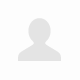
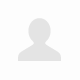

In [9]:
soup_2

In [11]:
soup_2.select('.area_graph_age > li')[1].select('.this_text_num')[0].get_text()

'7.50'